## Matplotlib Summary <a id='top'></a>

**Two interfaces**
* [scripted](#scripted)
* [object-oriented](#object)

**General Layouts**
* [fig.add_subplot()](#addsubplot)
    * [DataFrame](#dataframe)
    * [Major & Minor Ticks](#ticks)
* [plt.subplots()](#subplots)
* [fig.add_axes()](#addaxes)

**Histogram**
* [Stacked](#stacked)
* [PDF Distribution - Pylab](#dist_hist)

**Boxplots**
* [Examples](#boxplots_ex)
* [Grouped by Type](#boxplots_type)

**Plots - Iris Dataset**
* [Scatter Matrix](#scatter)
* [2D Scatter Plot](#2dplot)
    * [Hex Colors](#hex_col)
    * [Default](#2d_def)
    * [Customized - Dictionary](#2d_cust)
* [3D Scatter Plot and PCA](#3dplot)
* [Twin Axis](#twin)
* [Decision Boundary and SVC](#decision)

**Combination Plots**
* [Scatter - Histogram](#scatter_hist)
* [Violin Plots](#violin)
    * [Default](#violin_def)
    * [Customized](#violin_cust)
* [Heat Map](#heat)
    * [Regular Heat map](#reg_heat)
    * [Sequential Heat map](seq_heat)
* [Correlation Matrix - Heat map](#cor_mat)

In [1]:
from math import sin, pi
import numpy as np
import matplotlib.pyplot as plt
import pylab as py
import pandas as pd
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from matplotlib.ticker import NullFormatter
import matplotlib.patches as mpatches
import statsmodels.api as sm
%matplotlib inline

### [Interface: Scripted](#top) <a id='scripted'></a>

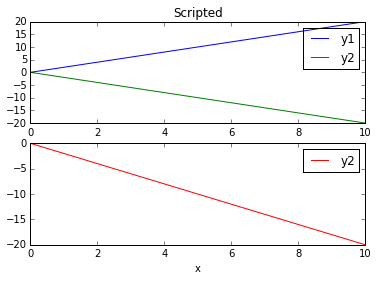

In [2]:
x = np.linspace(0, 10)
y1 = 2 * x
y2 = -2 * x

plt.subplot(2, 1, 1)
plt.plot(x, y1, label='y1') # First plot
plt.plot(x, y2, label='y2') # Second plot in same subplot
plt.title('Scripted')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(x, y2, label='y2', color='r') # Second plot in a separate subplot
plt.xlabel('x')
plt.legend()

plt.show()

###[Interface: Object-Oriented](#top) <a id='object'></a>

[**Using add_subplot**](#top) <a id='addsubplot'></a>

Arguments = (# of Rows, # of Columns, Plot Location)

For Plot Location, it is only an index starting from 1 to the total number of plots.

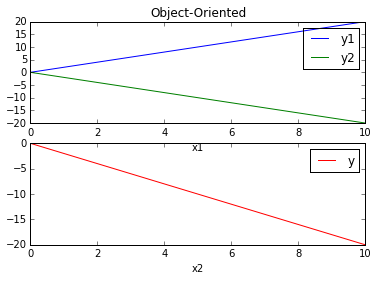

In [3]:
fig = plt.figure()

# ax = fig.add_suplot(111)
ax1 = fig.add_subplot(2, 1, 1) # or 211
ax1.plot(x, y1, label='y1') # can create the legend here
ax1.plot(x, y2, label='y2')
ax1.set_title('Object-Oriented')
ax1.set_xlabel('x1')
ax1.legend()

ax2 = fig.add_subplot(2, 1, 2) # or 212
ax2.plot(x, y2, color='r')
ax2.set_xlabel('x2')
ax2.legend('y2') # another way is to put the legend here
plt.show()

[**Using subplots**](#top) <a id='subplots'></a>

Arguments = (# of Rows, # of Columns)

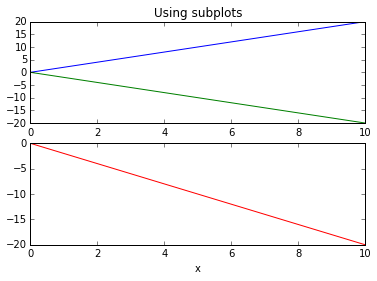

In [4]:
fig, ax = plt.subplots(2, 1)
# fig, (ax1, ax2) = plt.subplots(2, 1)

ax1 = ax[0]
ax2 = ax[1]

ax1.plot(x, y1)
ax1.plot(x, y2)
ax1.set_title('Using subplots')

ax2.plot(x, y2, color='r')
ax2.set_xlabel('x')

plt.show()

**Using 2 dimensions**

ax[i, j] = (row id, column id)

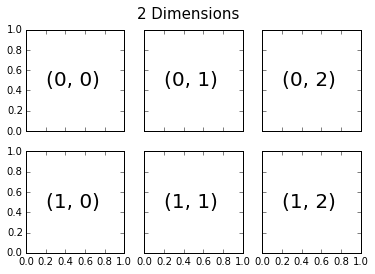

In [5]:
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.2, 0.45, str((i, j)), fontsize=20)
        
plt.suptitle('2 Dimensions', size=15)
plt.show()

[**Using add_axes**](#top) <a id='addaxes'></a>

Arguments = [left, bottom, width, height]

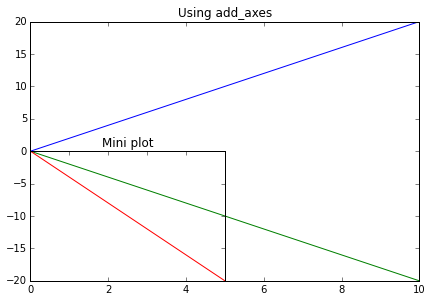

In [6]:
fig = plt.figure()

ax = fig.add_axes([0.1, 0.1, 0.9, 0.9])
ax.plot(x, y1)
ax.plot(x, y2)
ax.set_title('Using add_axes')

ax1 = fig.add_axes([0.1, 0.1, 0.45, 0.45])
ax1.plot(x, y2, color='r')
ax1.set_title('Mini plot')

ax1.tick_params(axis='x',
                which='both',
                bottom='off',
                labelbottom='off')
ax1.tick_params(axis='y',
                which='both',
                left='off',
                labelleft='off')
plt.show()

[**DataFrame**](#top)<a id='dataframe'></a>

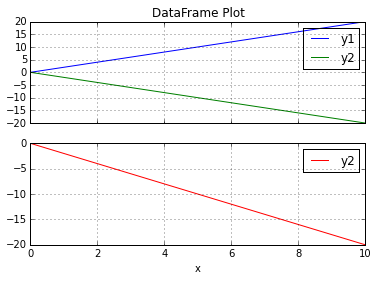

In [7]:
fig = plt.figure()

df = pd.DataFrame({'x': x, 'y1': y1, 'y2':y2})
ax1 = fig.add_subplot(2, 1, 1) # or 211
df.plot(x='x', y='y1', ax=ax1)
df.plot(x='x', y='y2', ax=ax1)
ax1.set_title('DataFrame Plot')
ax1.legend(['y1', 'y2']) # legend for dataframe

ax2 = fig.add_subplot(2, 1, 2) # or 212
df.plot(x='x', y='y2', color='r', ax=ax2)
ax2.set_xlabel('x')
ax2.legend(['y2'])

plt.show()

[**Major and Minor Ticks**](#top) <a id='ticks'></a>

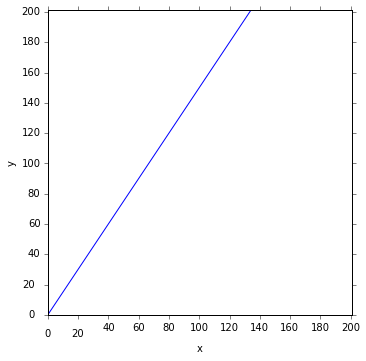

In [43]:
# From http://stackoverflow.com/questions/24963711/matplotlib-setting-both-major-and-minor-ticks-forces-same-x-and-y-scale

fig = plt.figure(figsize=(15, 12))

x = np.linspace(0, 150)
y = 1.5 * x

ax = fig.add_subplot(2, 1, 1) # or 211
ax.plot(x, y)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')

# I want max x axis to be 500
ax.set_xlim(0, 201)
# I want max y axis to be 300
ax.set_ylim(0, 201)

# Set major ticks for x axis
major_xticks = np.arange(0, 201, 20)

# Set major ticks for y axis
major_yticks = np.arange(0, 201, 20)

# I want minor ticks for x axis
# minor_xticks = np.arange(0, 201, 5)

# I want minor ticks for y axis
# minor_yticks = np.arange(0, 201, 5)

# Specify tick label size
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)
# ax.tick_params(axis = 'both', which = 'minor', labelsize = 0)
# Suppress minor tick labels

ax.set_xticks(major_xticks)
# ax.set_xticks(minor_yticks, minor = True)

ax.set_yticks(major_xticks)
# ax.set_yticks(minor_yticks, minor = True)

# Set both ticks to be outside
ax.tick_params(which = 'both', direction = 'out')
plt.show()

## [Histogram](#top)

[**Stacked Histogram**](#top)<a id='stacked'></a>

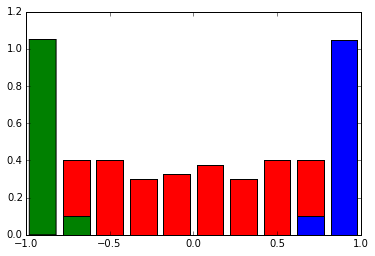

In [8]:
t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2 * pi * t)

upper = 0.77
lower = -0.77
condition1 = s > lower
supper = s[s > upper]
slower = s[s < lower]
smiddle =  s[condition1][s[condition1] < upper]  

plt.hist([supper,slower, smiddle], 
         bins=10, 
         stacked=True, 
         normed=True)

plt.show()

[**PDF Distribution Histogram - Pylab**](#top)<a id='dist_hist'></a>

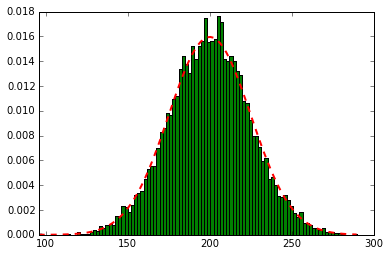

In [9]:
mu, sigma = 200, 25
x = mu + sigma * py.randn(10000)

# the histogram of the data with histtype='step'
n, bins, patches = py.hist(x, 100, normed=1)
py.setp(patches, 'facecolor', 'g', 'alpha', 1)
plt.xlim(x.min())
# add a line showing the expected distribution
y = py.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

## [Boxplots](#top)

[**Boxplots Examples**](#top)<a id='boxplots_ex'></a>

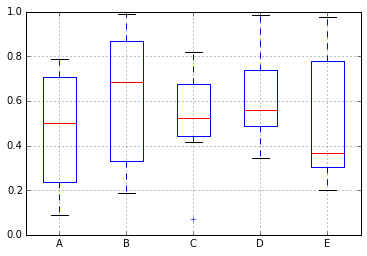

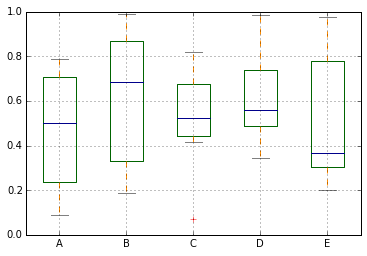

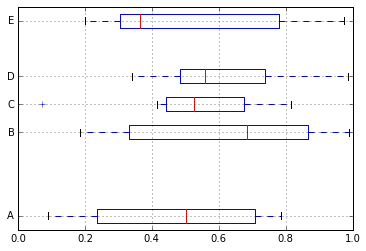

In [28]:
# http://pandas.pydata.org/pandas-docs/stable/visualization.html

df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])

df.plot(kind='box')
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
df.plot(kind='box', color=color, sym='r+')
df.plot(kind='box', vert=False, positions=[1, 4, 5, 6, 8])

plt.show()

[**Boxplot by Different type**](#top) <a id='boxplots_type'></a>

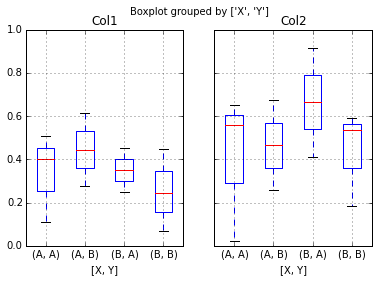

In [30]:
df = pd.DataFrame(np.random.rand(10,3), columns=['Col1', 'Col2', 'Col3'])
df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])
df['Y'] = pd.Series(['A','B','A','B','A','B','A','B','A','B'])

df.boxplot(column=['Col1','Col2'], by=['X','Y'])
plt.show()

##[Using the Iris Dataset](#top)

In [10]:
iris = datasets.load_iris()
x = iris.data
y = iris.target
h = 0.02

iris_df = pd.DataFrame(x[:, :2], columns=['sepal_length', 'sepal_width'])
iris_df['species'] = y

x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5

[**Scatter Matrix**](#top)<a id='scatter'></a>

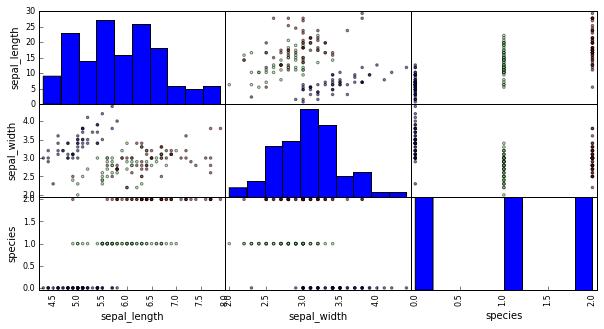

In [11]:
pd.scatter_matrix(iris_df, figsize=(10, 5),
                  alpha=0.5, 
                  s=25, 
                  c=iris_df.species)
plt.show()

[**2D Plot with Color**](#top)<a id='2dplot'></a>

from matplotlib.colors import ListedColormap  

    cmap = ListedColormap(['r', 'g', 'c', 'm'])
    b: blue
    g: green
    r: red
    c: cyan
    m: magenta
    y: yellow
    k: black
    w: white

[**Hex Named Colors**](#top) <a id='hex_col'></a>

In [12]:
import matplotlib
# will contain the color name and hex
dict(matplotlib.colors.cnames.iteritems())['blue']

u'#0000FF'

[**Default cmap - Matplotlib**](#top) <a id='2d_def'></a>

Uses the Paired cmap

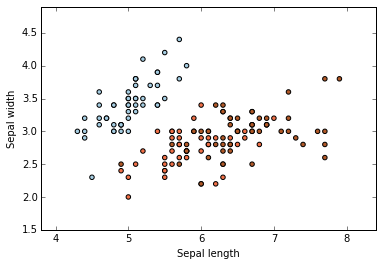

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired)
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

plt.show()

[**Customized color - Dictionary**](#top) <a id='2d_cust'></a>

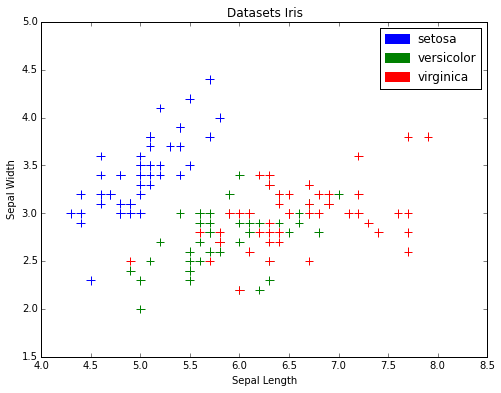

In [14]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(1, 1, 1) # or 111

# colors = {0: 'b', 1: 'g', 2: 'r'}

colors = {0: ('b','setosa'), 
          1: ('g','versicolor'), 
          2: ('r','virginica')}

ax1.scatter(x[:, 0], x[:, 1], 
            c=[colors[y_point][0] for y_point in y], 
            s=75, 
            marker='+')
# Marker Styles
# http://matplotlib.org/api/markers_api.html

ax1.set_title('Datasets Iris')
ax1.set_xlabel('Sepal Length')
ax1.set_ylabel('Sepal Width')

# legend_handles = [mpatches.Patch(color='b', label='setosa')]
# legend_handles += [mpatches.Patch(color='green', label='versicolor')]
# legend_handles += [mpatches.Patch(color='red', label='virginica')]

legend_handles = [mpatches.Patch(color=colors[y_point][0], 
                                 label=colors[y_point][1]) for y_point in colors.keys()]

plt.legend(handles=legend_handles)
plt.show()

[**3D Plot after PCA**](#top)<a id='3dplot'></a>

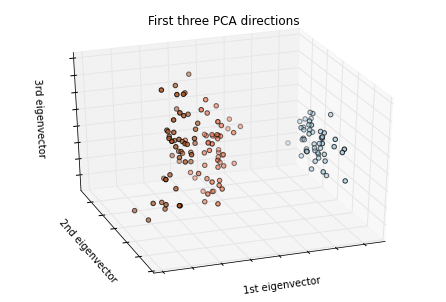

In [25]:
# plot the first three PCA dimensions
# x_reduced.shape = (150, 3) , 150 points per 3 dimensions
pca = PCA(n_components=3)
x_reduced = pca.fit_transform(x)

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure()
# Create 3D axes and rotate down 150 deg and 110 deg past azimuth
ax = Axes3D(fig, elev=-150, azim=110)

# Plot 3D scatter plot from second dimension of x_reduced, 
# can be thought of as ScatterPlot(x, y, z)

# c = y : color of points
# cmap = plt.cm.Paired: color map of each iris species

ax.scatter(x_reduced[:, 0], x_reduced[:, 1], x_reduced[:, 2], 
           c=y,
           cmap=plt.cm.Paired)

# Will bound the plot the min and max of the axis (3 dimensions)
ax.autoscale_view(True,True,True)

ax.set_title("First three PCA directions")
# set the labels and remove the ticklabels
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])

ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])

ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

[**Plotting with Twin Axis**](#top)<a id='twin'></a>

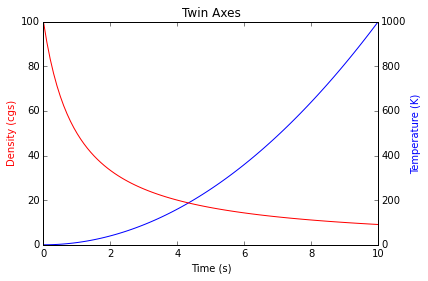

In [16]:
# To add a second y axis to an existing figure, use twinx

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

t = np.linspace(0., 10., 100)
ax1.plot(t, t ** 2, color='b')
ax2.plot(t, 1000 / (t + 1), color='r')
ax1.set_ylabel('Density (cgs)', color='red')
ax2.set_ylabel('Temperature (K)', color='blue')
ax1.set_xlabel('Time (s)')
ax1.set_title('Twin Axes')

plt.show()

[**Decision Boundary with SVC**](#top)<a id='decision'></a>

    cmaps = [('Sequential',     ['Blues', 'BuGn', 'BuPu',
                                  'GnBu', 'Greens', 'Greys', 
                                  'Oranges', 'OrRd', 'PuBu', 
                                  'PuBuGn', 'PuRd', 'Purples', 
                                  'RdPu', 'Reds', 'YlGn', 
                                  'YlGnBu', 'YlOrBr', 'YlOrRd']),

              ('Sequential (2)', ['afmhot', 'autumn', 'bone', 
                                  'cool', 'copper', 'gist_heat', 
                                  'gray', 'hot', 'pink',
                                  'spring', 'summer', 'winter']),

              ('Diverging',      ['BrBG', 'bwr', 'coolwarm', 
                                  'PiYG', 'PRGn','PuOr',
                                  'RdBu', 'RdGy', 'RdYlBu', 
                                  'RdYlGn', 'Spectral', 'seismic']),

              ('Qualitative',    ['Accent', 'Dark2', 'Paired', 
                                  'Pastel1', 'Pastel2', 'Set1', 
                                  'Set2', 'Set3']),

              ('Miscellaneous',  ['gist_earth', 'terrain', 'ocean',
                                  'gist_stern', 'brg', 'CMRmap', 
                                  'cubehelix', 'gnuplot', 'gnuplot2', 
                                  'gist_ncar', 'nipy_spectral', 'jet',
                                  'rainbow', 'gist_rainbow', 'hsv', 
                                  'flag', 'prism'])]

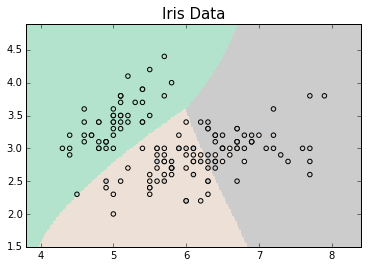

x-axis mesh 
[[ 3.8   3.82  3.84 ...,  8.36  8.38  8.4 ]
 [ 3.8   3.82  3.84 ...,  8.36  8.38  8.4 ]
 [ 3.8   3.82  3.84 ...,  8.36  8.38  8.4 ]
 ..., 
 [ 3.8   3.82  3.84 ...,  8.36  8.38  8.4 ]
 [ 3.8   3.82  3.84 ...,  8.36  8.38  8.4 ]
 [ 3.8   3.82  3.84 ...,  8.36  8.38  8.4 ]] 


y-axis mesh 
[[ 1.5   1.5   1.5  ...,  1.5   1.5   1.5 ]
 [ 1.52  1.52  1.52 ...,  1.52  1.52  1.52]
 [ 1.54  1.54  1.54 ...,  1.54  1.54  1.54]
 ..., 
 [ 4.86  4.86  4.86 ...,  4.86  4.86  4.86]
 [ 4.88  4.88  4.88 ...,  4.88  4.88  4.88]
 [ 4.9   4.9   4.9  ...,  4.9   4.9   4.9 ]] 


z-axis (color) 
[[0 0 0 ..., 2 2 2]
 [0 0 0 ..., 2 2 2]
 [0 0 0 ..., 2 2 2]
 ..., 
 [0 0 0 ..., 2 2 2]
 [0 0 0 ..., 2 2 2]
 [0 0 0 ..., 2 2 2]]


In [17]:
model = SVC()
model.fit(x[:, :2], y)

# Plot the decision boundary.
# For that, we will assign a color to each point in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
z = z.reshape(xx.shape)

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the color mesh
ax.pcolormesh(xx, yy, z, cmap=plt.get_cmap('Pastel2'))

# Plot the data points
ax.scatter(x[:, 0], x[:, 1], c=y, 
            edgecolors='k', cmap=plt.get_cmap('Pastel2'))

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_title('Iris Data', size=15)

plt.show()

print 'x-axis mesh \n', xx, '\n\n'
print 'y-axis mesh \n', yy, '\n\n'
print 'z-axis (color) \n', z

## [Combination Plots](#top)

[**Scatter with Histogram**](#top)<a id='scatter_hist'></a>

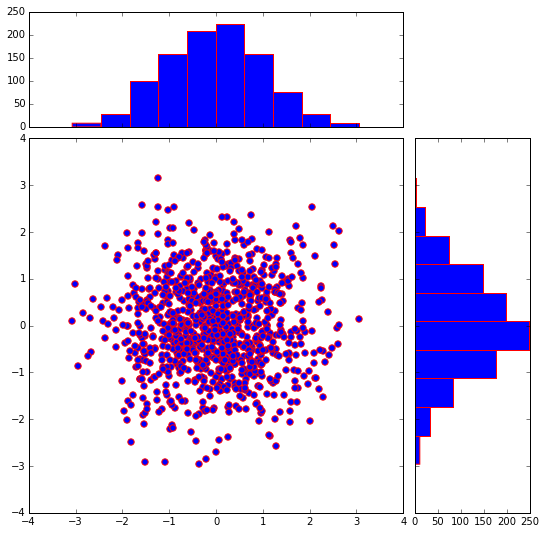

In [18]:
# the random data
x = np.random.randn(1000)
y = np.random.randn(1000)

# no labels
nullfmt = NullFormatter()

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.scatter(x, y, s = 40, edgecolor = "red")
#axScatter.patch(edgecolor = "r")

# now determine nice limits by hand:
binwidth = 0.25
# xymax = np.max( [np.max(np.fabs(x)), np.max(np.fabs(y))] )
# lim = ( int(xymax/binwidth) + 1) * binwidth

# axScatter.set_xlim( (-lim, lim) )
# axScatter.set_ylim( (-lim, lim) )

# bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=10, edgecolor = "red")
axHisty.hist(y, bins=10, orientation='horizontal', edgecolor= "red")

axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )

plt.show()

## [Heat Map](#top) <a id='heat'></a>

[**Reg Heat Map**](#top)<a id='reg_heat'></a>

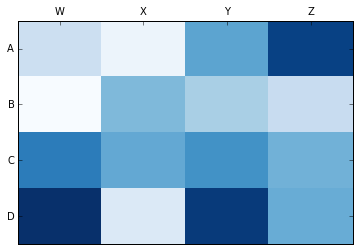

In [19]:
# Random number generated heatmap plot

column_labels = list('ABCD')
row_labels = list('WXYZ')
data = np.random.rand(4,4)
fig, ax = plt.subplots()
heatmap = ax.pcolor(data, cmap=plt.cm.Blues)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[0])+0.5, 
              minor=False)
ax.set_yticks(np.arange(data.shape[1])+0.5, 
              minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
plt.show()

[**Sequential Heat Map**](#top)<a id='seq_heat'></a>

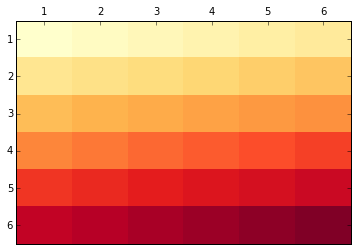

In [20]:
column_labels = list('123456')
row_labels = list('123456')
#data = np.random.rand(4,4)
data = np.arange(36).reshape(6,6)
fig, ax = plt.subplots()
heatmap = ax.pcolor(data, cmap=plt.cm.YlOrRd)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[0])+0.5, 
              minor=False)
ax.set_yticks(np.arange(data.shape[1])+0.5, 
              minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(row_labels, 
                   minor=False)
ax.set_yticklabels(column_labels, 
                   minor=False)

plt.show()

## [Violin Plots](#top) <a id='violin'></a>

[**Default Violin Plots**](#top)<a id='violin_def'></a>

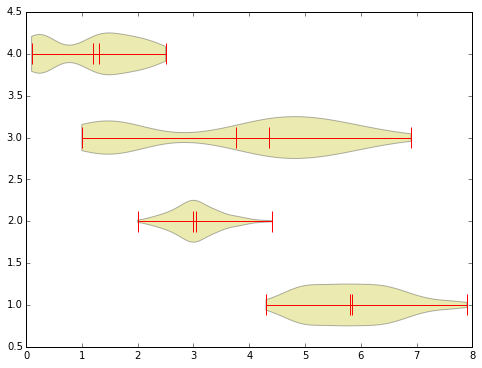

In [21]:
x = iris.data[:, :4]
y = iris.target

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(1, 1, 1) # or 111

ax1.violinplot(x, showmeans=True, showmedians=True, vert=False)

plt.show()

[**Customized Violin Plot**](#top)<a id='violin_cust'></a>

[u'cbars', u'cmedians', u'cmins', u'cmaxes', u'bodies', u'cmeans']


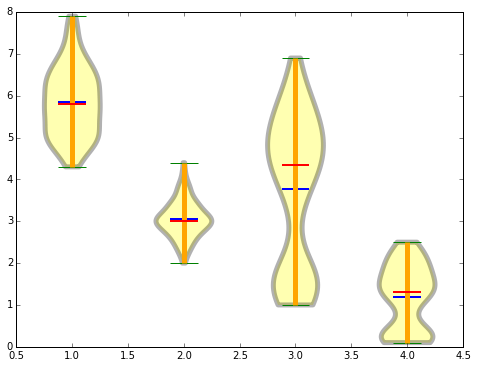

In [22]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(1, 1, 1) # or 111

result = ax1.violinplot(x, showmeans=True, showmedians=True)

for pc in result['bodies']:
   pc.set_color('yellow')
   pc.set_edgecolors('black')
   pc.set_linewidth(5)

print result.keys()

result['cmeans'].set_color('b')
result['cmeans'].set_linewidths(2)

result['cmaxes'].set_color('g')
result['cmins'].set_color('g')
result['cmedians'].set_color('red')
result['cmedians'].set_linewidths(2)
result['cbars'].set_color('orange')
result['cbars'].set_linewidths(5)

plt.show()

[**Correlation Matrix - Statsmodel**](#top) <a id='cor_mat'></a>

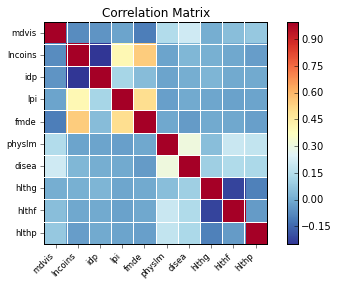

In [23]:
hie_data = sm.datasets.randhie.load_pandas()
corr_matrix = np.corrcoef(hie_data.data.T)
sm.graphics.plot_corr(corr_matrix, xnames=hie_data.names)

plt.show()